## Neural network - basic behavior

Laurent Cetinsoy - Datadidacte - personal use only

In order to get a bit of understanding and practice with keras we are going to test a few different architectures and their impact of the model performance

## Effect of the activation function

we want to see what is the impact of the activation function and compare the performance of sigmoid layers versus relu layers

Load the  mnist dataset from the tensorflow.keras.datasets module 

In [1]:
from tensorflow.keras.datasets import mnist

# Charger le dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Display the first image of the train dataset with matplotlib

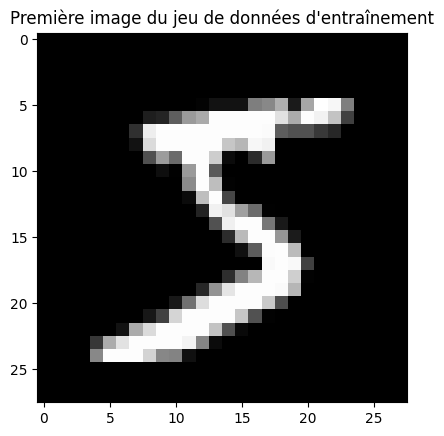

In [2]:
import matplotlib.pyplot as plt

# Afficher la première image du jeu de données d'entraînement
plt.imshow(x_train[0], cmap='gray')
plt.title('Première image du jeu de données d\'entraînement')
plt.show()

Display the number of classes in the dataset

In [3]:
import numpy as np

# Calculer le nombre unique d'étiquettes dans le dataset
num_classes = np.unique(y_train).size

print("Nombre de classes dans le dataset :", num_classes)

Nombre de classes dans le dataset : 10


Create a simple neural network with the following structure : 

- One dense layer with **sigmoid** activation and 300 neurones
- One dense layer with **sigmoid** activation and 100 neurones 
- One dense layer with softmax activation. How many neurones should there be ? 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Nombre de classes dans votre dataset, par exemple 10 pour MNIST
num_classes = 10

model = Sequential([
    Dense(300, activation='sigmoid', input_shape=(784,)),  # Assurez-vous que la taille d'entrée correspond à votre dataset
    Dense(100, activation='sigmoid'),
    Dense(num_classes, activation='softmax')
])

model.summary()

C:\Users\Nathan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model with the sgd optimizer and the sparse_categorical_crossentropy_loss

In [5]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Reshape the images so that each image is a vector. Remember to normalize the dataset by doing a min-max scaling


In [6]:
import numpy as np

# Remodeler les images en vecteurs
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)  # Transforme en vecteurs de taille (nombre_images, 784) pour MNIST
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Normaliser les données pour avoir des valeurs entre 0 et 1
x_train_normalized = x_train_reshaped.astype('float32') / 255
x_test_normalized = x_test_reshaped.astype('float32') / 255

Train the model for 10 epochs and display the loss versus the number of epochs. For that you can use Keras callbacks : https://keras.io/api/callbacks/

Does it train well ? 

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2386 - loss: 2.2615 - val_accuracy: 0.5919 - val_loss: 2.0075
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6139 - loss: 1.8646 - val_accuracy: 0.7649 - val_loss: 1.3356
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7382 - loss: 1.2104 - val_accuracy: 0.8207 - val_loss: 0.8782
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8009 - loss: 0.8461 - val_accuracy: 0.8424 - val_loss: 0.6715
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8336 - loss: 0.6662 - val_accuracy: 0.8594 - val_loss: 0.5628
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8495 - loss: 0.5758 - val_accuracy: 0.8752 - val_loss: 0.4934
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8667 - loss: 0.5046 - val_accuracy: 0.8823 - val_loss: 0.4471
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8737 - loss: 0.4624 -

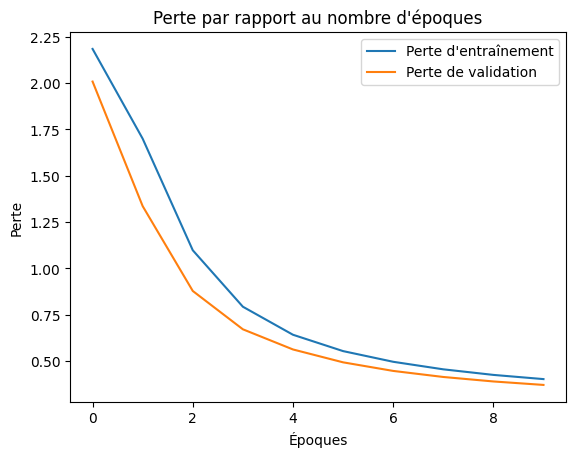

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History

# Assurez-vous que votre modèle est correctement construit et compilé à ce stade

# Entraîner le modèle
history = model.fit(x_train_normalized, y_train, epochs=10, validation_split=0.2, callbacks=[History()])

# Tracer la perte par rapport aux époques
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte par rapport au nombre d\'époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

Make another model by replacing this time the sigmoid activations by Relu. Train again the model and display the loss curve. Is it better ? 

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7279 - loss: 1.0648 - val_accuracy: 0.9110 - val_loss: 0.3115
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9093 - loss: 0.3162 - val_accuracy: 0.9303 - val_loss: 0.2491
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9274 - loss: 0.2525 - val_accuracy: 0.9394 - val_loss: 0.2147
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9378 - loss: 0.2172 - val_accuracy: 0.9443 - val_loss: 0.1970
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9475 - loss: 0.1896 - val_accuracy: 0.9477 - val_loss: 0.1826
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9526 - loss: 0.1653 - val_accuracy: 0.9552 - val_loss: 0.1635
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9583 - loss: 0.1506 - val_accuracy: 0.9585 - val_loss: 0.1490
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9605 - loss: 0.1371 - 

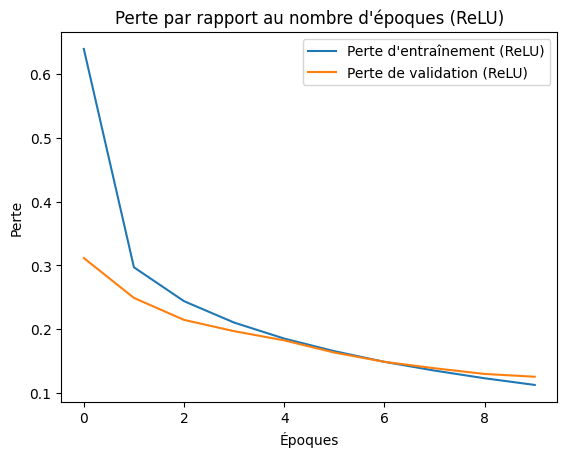

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Créer le modèle avec des activations ReLU
model_relu = Sequential([
    Dense(300, activation='relu', input_shape=(784,)),  # Assurez-vous que la taille d'entrée correspond à votre dataset
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # 10 pour MNIST
])

# Compiler le modèle
model_relu.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_relu = model_relu.fit(x_train_normalized, y_train, epochs=10, validation_split=0.2, callbacks=[History()])

# Tracer la courbe de perte
plt.plot(history_relu.history['loss'], label='Perte d\'entraînement (ReLU)')
plt.plot(history_relu.history['val_loss'], label='Perte de validation (ReLU)')
plt.title('Perte par rapport au nombre d\'époques (ReLU)')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

Do the same with the selu function 

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8063 - loss: 0.6812 - val_accuracy: 0.9149 - val_loss: 0.3072
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9120 - loss: 0.3077 - val_accuracy: 0.9259 - val_loss: 0.2655
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9225 - loss: 0.2700 - val_accuracy: 0.9311 - val_loss: 0.2480
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9319 - loss: 0.2388 - val_accuracy: 0.9393 - val_loss: 0.2196
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9377 - loss: 0.2215 - val_accuracy: 0.9419 - val_loss: 0.2077
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9448 - loss: 0.1948 - val_accuracy: 0.9482 - val_loss: 0.1890
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9493 - loss: 0.1789 - val_accuracy: 0.9521 - val_loss: 0.1772
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9534 - loss: 0.1639 - 

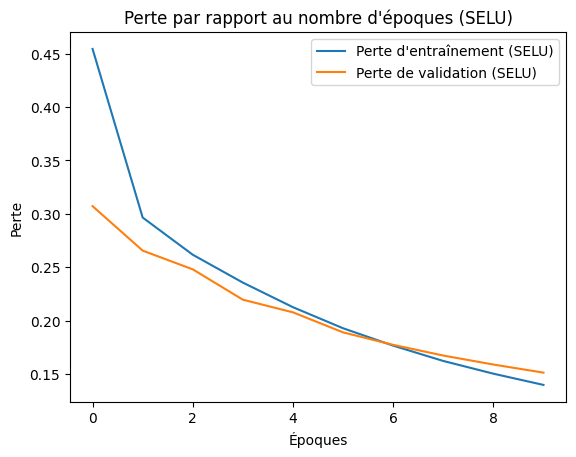

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Créer le modèle avec des activations SELU
model_selu = Sequential([
    Dense(300, activation='selu', input_shape=(784,)),  # Assurez-vous que la taille d'entrée correspond à votre dataset
    Dense(100, activation='selu'),
    Dense(10, activation='softmax')  # 10 pour MNIST
])

# Compiler le modèle
model_selu.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_selu = model_selu.fit(x_train_normalized, y_train, epochs=10, validation_split=0.2, callbacks=[History()])

# Tracer la courbe de perte
plt.plot(history_selu.history['loss'], label='Perte d\'entraînement (SELU)')
plt.plot(history_selu.history['val_loss'], label='Perte de validation (SELU)')
plt.title('Perte par rapport au nombre d\'époques (SELU)')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

## Effect of the size 

In this section we want to study the effect of the size of the network on the learning

Re-use the previous network and try to increase its size by using the following number of neurones : 

-  800 for first layer
- 500 for second layer
- same size


You might need to train the network longer, but does it reach a better performance ? 

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8326 - loss: 0.5928 - val_accuracy: 0.9171 - val_loss: 0.2907
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9157 - loss: 0.2982 - val_accuracy: 0.9249 - val_loss: 0.2655
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9254 - loss: 0.2599 - val_accuracy: 0.9320 - val_loss: 0.2460
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9336 - loss: 0.2380 - val_accuracy: 0.9365 - val_loss: 0.2307
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9377 - loss: 0.2212 - val_accuracy: 0.9398 - val_loss: 0.2186
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9430 - loss: 0.2007 - val_accuracy: 0.9449 - val_loss: 0.2012
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9478 - loss: 0.1843 - val_accuracy: 0.9475 - val_loss: 0.1908
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9531 - loss: 0.1

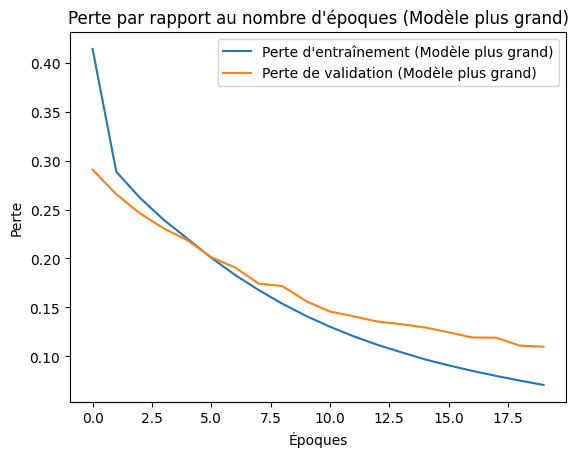

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Modifier le modèle pour augmenter sa taille
model_larger = Sequential([
    Dense(800, activation='selu', input_shape=(784,)),  # Assurez-vous que la taille d'entrée correspond à votre dataset
    Dense(500, activation='selu'),
    Dense(10, activation='softmax')  # 10 pour MNIST ou ajustez selon votre dataset
])

# Compiler le modèle
model_larger.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle plus longtemps, par exemple 20 époques
history_larger = model_larger.fit(x_train_normalized, y_train, epochs=20, validation_split=0.2, callbacks=[History()])

# Tracer la courbe de perte
plt.plot(history_larger.history['loss'], label='Perte d\'entraînement (Modèle plus grand)')
plt.plot(history_larger.history['val_loss'], label='Perte de validation (Modèle plus grand)')
plt.title('Perte par rapport au nombre d\'époques (Modèle plus grand)')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

Bonus : train a big network (more than 5 layers). Does it overfit or has it still good performance ? 

## Effect of the parameter initialization 

The way the parameters of a network are initialized can have a great impact on the training process. 



Create a model with the same structure as the previous section. Initialize all weight values to 0 (cf https://keras.io/api/layers/initializers/)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Zeros

# Créer le modèle avec des poids initialisés à 0
model_zeros = Sequential([
    Dense(800, activation='selu', kernel_initializer=Zeros(), input_shape=(784,)),
    Dense(500, activation='selu', kernel_initializer=Zeros()),
    Dense(10, activation='softmax', kernel_initializer=Zeros())  # Ajustez le nombre de neurones dans la dernière couche selon votre dataset
])

# Compiler le modèle
model_zeros.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model on the dataset and display the loss. Are you shocked ?

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1105 - loss: 2.3020 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1121 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1156 - loss: 2.3006 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1148 - loss: 2.3009 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.1140 - loss: 2.3010 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1142 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1149 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1142 - loss: 2

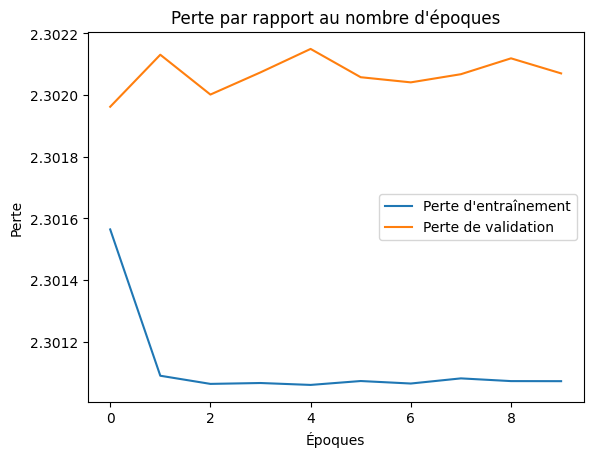

In [12]:
import matplotlib.pyplot as plt

# Supposons que x_train_normalized et y_train sont vos données d'entraînement préparées
# et que model_zeros est le modèle initialisé avec des poids à 0.

# Entraîner le modèle
history_zeros = model_zeros.fit(x_train_normalized, y_train, epochs=10, validation_split=0.2)

# Tracer la courbe de perte
plt.plot(history_zeros.history['loss'], label='Perte d\'entraînement')
plt.plot(history_zeros.history['val_loss'], label='Perte de validation')
plt.title('Perte par rapport au nombre d\'époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

## Effect of the optimizer

This time we want to study the effect of the optimization process on the network 


Instanciate the Optimizer SGD with a learning rate equaling to 0.1 and train the model 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Supposons que vous avez déjà défini votre modèle ici
model = Sequential([
    Dense(800, activation='selu', input_shape=(784,)),
    Dense(500, activation='selu'),
    Dense(10, activation='softmax')
])

# Instancier l'optimiseur SGD avec un taux d'apprentissage de 0.1
optimizer_sgd = SGD(learning_rate=0.1)

# Compiler le modèle avec l'optimiseur SGD
model.compile(optimizer=optimizer_sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
# Assurez-vous que x_train_normalized, y_train sont vos données d'entraînement
history = model.fit(x_train_normalized, y_train, epochs=10, validation_split=0.2)

Do the same with a learning rate of 0.01

In [ ]:
from tensorflow.keras.optimizers import SGD

# Instancier l'optimiseur SGD avec un taux d'apprentissage de 0.01
optimizer_sgd_001 = SGD(learning_rate=0.01)

# Compiler le modèle avec l'optimiseur SGD ajusté
model.compile(optimizer=optimizer_sgd_001, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_001 = model.fit(x_train_normalized, y_train, epochs=10, validation_split=0.2)

Do the same with a learning rate of 0.9. Does it still work ? 

In [ ]:
from tensorflow.keras.optimizers import SGD

# Instancier l'optimiseur SGD avec un taux d'apprentissage de 0.9
optimizer_sgd_09 = SGD(learning_rate=0.9)

# Compiler le modèle avec l'optimiseur SGD ajusté
model.compile(optimizer=optimizer_sgd_09, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_09 = model.fit(x_train_normalized, y_train, epochs=10, validation_split=0.2)

Use the callback Reduce learning rate on plateau (https://keras.io/api/callbacks/reduce_lr_on_plateau/) and start with a pretty high learning rate. Is the learning faster ?


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définir le modèle
model = Sequential([
    Dense(800, activation='selu', input_shape=(784,)),
    Dense(500, activation='selu'),
    Dense(10, activation='softmax')
])

# Instancier l'optimiseur avec un taux d'apprentissage initial élevé
optimizer = SGD(learning_rate=0.9)

# Compiler le modèle
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Configurer le callback ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Entraîner le modèle avec le callback
history = model.fit(x_train_normalized, y_train, epochs=50, validation_split=0.2, callbacks=[reduce_lr])

Bonus : with the https://keras.io/api/callbacks/learning_rate_scheduler/ 

Implement the cyclical learning rate schema as follow (from "Cyclical Learning Rates for Training Neural Networks" Smith - https://arxiv.org/abs/1506.01186)

Bonus : do the study activation function and size on a more complexe dataset like cifar 10 

Bonus : do the same with a small convolutional network

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b859965-b858-4b8d-a841-009599aef86e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>